**Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.**

###Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time
# upsample to daily intervals
from pandas import read_excel
from matplotlib import pyplot 

###Import Data collection and description

In [ ]:
air_data = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
air_data.head()


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [ ]:
upsampled = air_data.resample('D').mean()
print(upsampled.head(32)) 

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


### interpolate the missing value

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


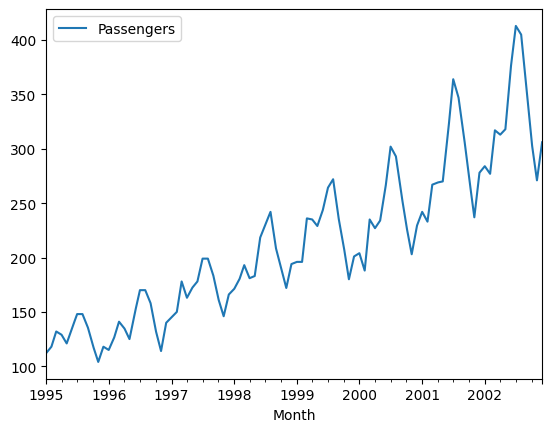

In [ ]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show() 

### Downsampling Data

In [ ]:
# downsample to quarterly intervals
from pandas import read_excel
from datetime import datetime
from matplotlib import pyplot

In [ ]:
resample = air_data.resample('Q')
quarterly_mean_sales = resample.mean() 
quarterly_mean_sales 

,Passengers
Month,
1995-03-31,120.666667
1995-06-30,128.333333
1995-09-30,144.000000
1995-12-31,113.666667
1996-03-31,127.333333
1996-06-30,136.333333
1996-09-30,166.000000
1996-12-31,129.000000
1997-03-31,157.666667


            Passengers
Month                 
1995-03-31  120.666667
1995-06-30  128.333333
1995-09-30  144.000000
1995-12-31  113.666667
1996-03-31  127.333333


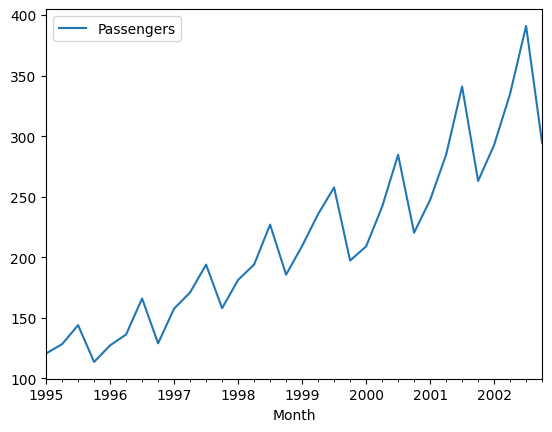

In [ ]:
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show() 

### Tranformations

In [ ]:
# load and plot a time series
from pandas import read_excel
from matplotlib import pyplot 

In [ ]:
air_data = read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)

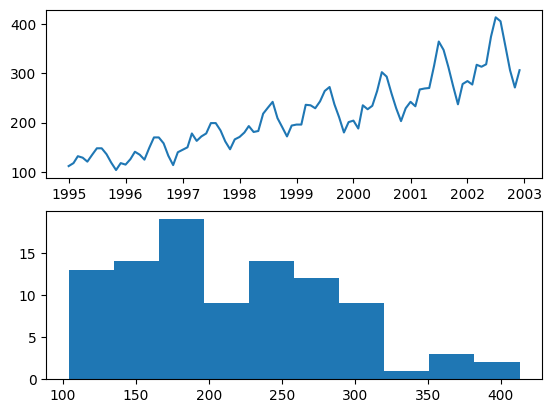

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(air_data)
# histogram
pyplot.subplot(212)
pyplot.hist(air_data)
pyplot.show() 

### Square Root Transform

In [ ]:
from pandas import read_excel
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [ ]:
dataframe = DataFrame(air_data.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])  

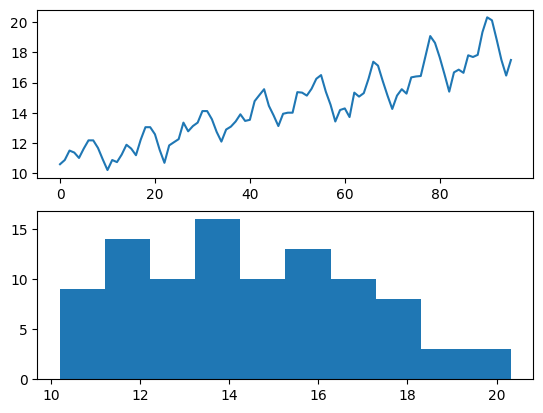

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show() 

### Log Transform

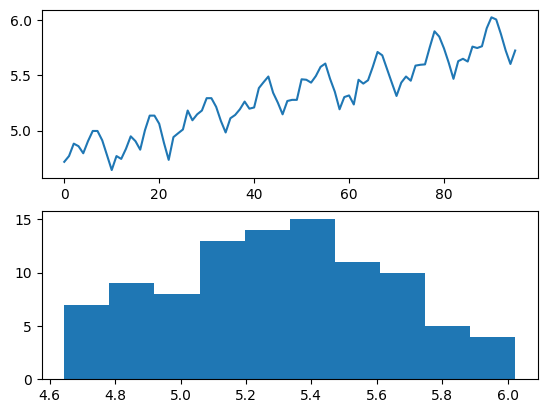

In [ ]:
from numpy import log
dataframe = DataFrame(air_data.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show() 

In [ ]:
air_data2 = air_data.copy()
air_data2 = air_data2.reset_index()

<Axes: >

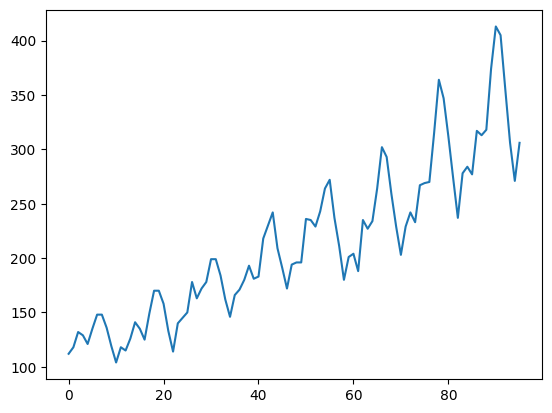

In [ ]:
air_data2.Passengers.plot() 

### Splitting data

In [ ]:
Train = air_data2.head(84)
Test = air_data2.tail(12) 

###Moving Average 

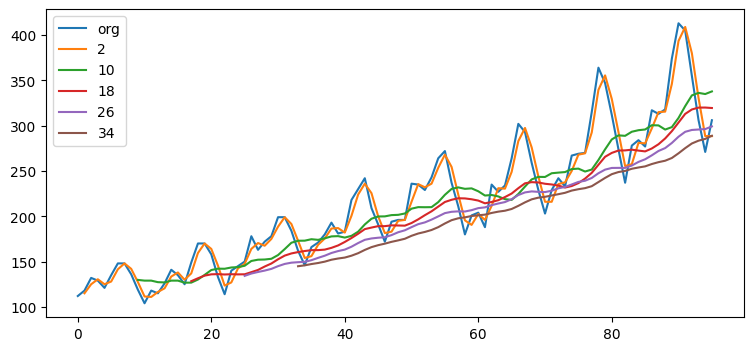

In [ ]:
plt.figure(figsize=(9,4))
air_data2.Passengers.plot(label="org")
for i in range(2,40,8):
    air_data2["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

###Time series decomposition plot 

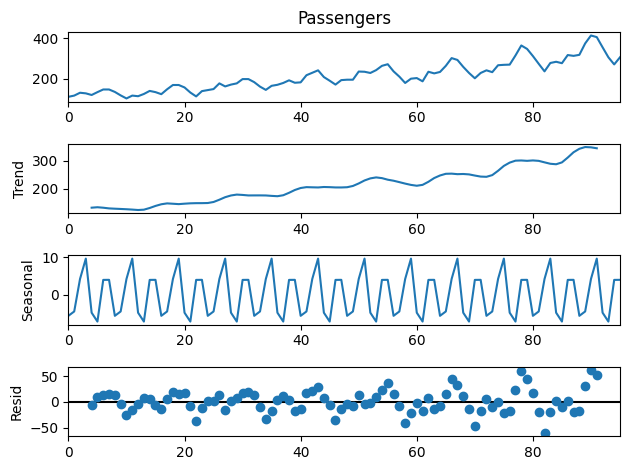

In [ ]:
decompose_ts_add = seasonal_decompose(air_data2.Passengers,period=8)
decompose_ts_add.plot()
plt.show() 

###ACF plots and PACF plots


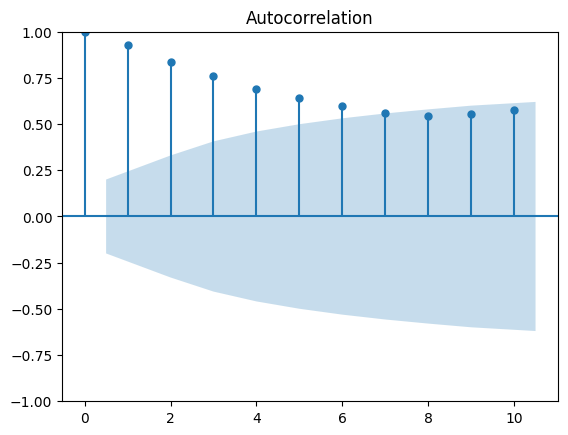

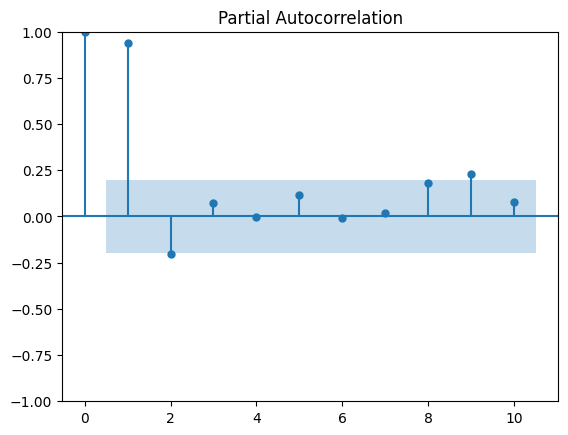

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air_data2.Passengers,lags=10)
tsa_plots.plot_pacf(air_data2.Passengers,lags=10)
plt.show() 

### Evaluation Metric MAPE

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

### Simple Exponential Method

In [ ]:
air_data2["Passengers"] = air_data2["Passengers"].astype('double') 
ses_model = SimpleExpSmoothing(air_data2["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)   

11.652581888339924

### Holt method 

In [ ]:
# Holt method 
hw_model = Holt(air_data2["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)  

9.843474829332123

### Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(air_data2["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)  

2.038558045831413

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(air_data2["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)  

1.186249403428661

## Final Model by combining train and test

In [ ]:
air_data2["Passengers"] = air_data2["Passengers"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(air_data2["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()  

In [ ]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)   

96     312.899424
97     308.171306
98     355.532782
99     345.769814
100    345.696096
101    392.470733
102    436.501361
103    429.859243
104    380.172872
105    332.317301
dtype: float64